In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read Dataset
csv_path = '../Resources/fossil-fuel-co2-emissions-by-nation.csv'
data = pd.read_csv(csv_path)

data.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


# Cleaning data:

In [3]:
#Lowering case for 'Country' column
data['Country'] = data['Country'].str.lower()

#We'll use data from 1960 and over
data = data.loc[data.Year > 1959]

#We have to clean all the parentheses from the Country collumn
data ['Country'] = data['Country'].str.replace(r"\s+\(.*\)","")
data ['Country'] = data['Country'].str.replace(r"&","and")

#Clean and standarize country names:
data['Country'] = data['Country'].str.replace(r"plurinational state of bolivia","bolivia")
data['Country'] = data['Country'].str.replace(r"brunei","brunei darussalam")
data['Country'] = data['Country'].str.replace(r"republic of cameroon","cameroon")
data['Country'] = data['Country'].str.replace(r"guinea bissau","guinea-bissau")
data['Country'] = data['Country'].str.replace(r"islamic republic of iran","iran")
data['Country'] = data['Country'].str.replace(r"libyan arab jamahiriyah","libya")
data['Country'] = data['Country'].str.replace(r"st. kitts-nevis","saint kitts and nevis")
data['Country'] = data['Country'].str.replace(r"russian federation","russia")
data['Country'] = data['Country'].str.replace(r"st. vincent and the grenadines","saint vincent and the grenadines")
data['Country'] = data['Country'].str.replace(r"republic of south sudan","south sudan")
data['Country'] = data['Country'].str.replace(r"syrian arab republic","syria")
data['Country'] = data['Country'].str.replace(r"macedonia","the former yugoslav republic of macedonia")
data['Country'] = data['Country'].str.replace(r"timor-leste","timor leste")
data['Country'] = data['Country'].str.replace(r"united states of america","united states")

#Reset Index
data.reset_index()

data.head()

#data['Country'].nunique()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
6352,1960,afghanistan,113,35,74,0,5,0,0.01,0
6353,1960,albania,552,89,430,23,10,0,0.34,0
6354,1960,algeria,1680,343,1193,0,144,0,0.16,438
6355,1960,angola,150,34,95,0,22,0,0.03,41
6356,1960,antigua and barbuda,10,0,10,0,0,0,0.18,0


We will only focus on countries that are members of the ONU.

In [4]:
#Bring ONU Countries to a DF:
file_path = '../Resources/ONU.csv'
onu_df = pd.read_csv(file_path, encoding='UTF-8')

#Clean 'Country' column from () [] etc:
onu_df['Country'] = onu_df['Country'].str.lower()
onu_df['Country'] = onu_df['Country'].str.replace(r"\s+\(.*\)","")
onu_df['Country'] = onu_df['Country'].str.replace(r"\s+\[.*\]","")
onu_df['Country'] = onu_df['Country'].str.replace(r"\[.*\]","")

#Clean and standarize these countries:
onu_df['Country'] = onu_df['Country'].str.replace(r"cÃ´te dâ€™ivoire","cote d ivoire")
onu_df['Country'] = onu_df['Country'].str.replace(r"democratic peopleâ€™s republic of korea","democratic people s republic of korea")
onu_df['Country'] = onu_df['Country'].str.replace(r"lao peopleâ€™s democratic republic","lao people s democratic republic")
onu_df['Country'] = onu_df['Country'].str.replace(r"united of republic of tanzania","united republic of tanzania")

#onu_df.to_csv('out_ONU.csv', encoding='UTF-8')

onu_df.head()

,Country,Date of Admission
0,afghanistan,19-Nov-46
1,albania,14-Dec-55
2,algeria,08-Oct-62
3,andorra,28-Jul-93
4,angola,01-Dec-76


# Let's merge the two Dataframes. Doing this, we'll only get data from ONU's  members.

In [5]:
country_df = pd.merge(onu_df, data, on="Country")

#Export DF to csv for merging with other DFs.
country_df.to_csv('../Resources/CO2_country.csv', encoding='UTF-8')
country_df['Country'].nunique()

187

Ask user to input the country

Please type the country you would like to analyze: russia


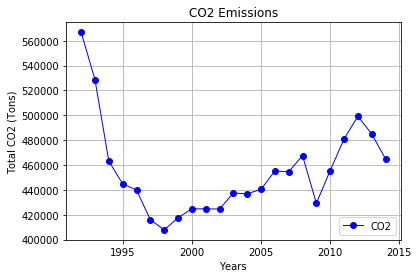

In [6]:
country = input ("Please type the country you would like to analyze: ").lower()

country_plt = country_df[country_df['Country'] == country]

plt.plot(country_plt['Year'], country_plt['Total'], marker ='o', color='blue', label="CO2",
         linestyle='solid', linewidth=1, markersize=6
        )

plt.legend(loc="lower right")

plt.title("CO2 Emissions")
plt.xlabel("Years")
plt.ylabel("Total CO2 (Tons)")

plt.grid(True)

plt.show()

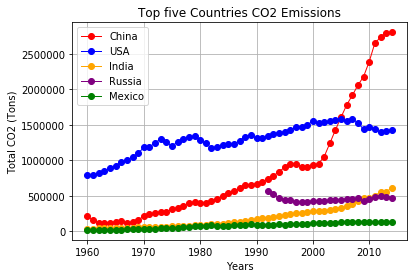

In [7]:
#List our top four countries plus Mexico:

top_countries = ['china', 'united states', 'india', 'russia', 'mexico']

china = country_df[country_df['Country'] == 'china']
us = country_df[country_df['Country'] == 'united states']
india = country_df[country_df['Country'] == 'india']
rusia = country_df[country_df['Country'] == 'russia']
mexico = country_df[country_df['Country'] == 'mexico']


plt.plot(china['Year'], china['Total'], marker ='o', color='red', label="China",
         linestyle='solid', linewidth=1, markersize=6
        )

plt.plot(us['Year'], us['Total'], marker ='o', color='blue', label="USA",
         linestyle='solid', linewidth=1, markersize=6
        )

plt.plot(india['Year'], india['Total'], marker ='o', color='orange', label="India",
         linestyle='solid', linewidth=1, markersize=6
        )

plt.plot(rusia['Year'], rusia['Total'], marker ='o', color='purple', label="Russia",
         linestyle='solid', linewidth=1, markersize=6
        )

plt.plot(mexico['Year'], mexico['Total'], marker ='o', color='green', label="Mexico",
         linestyle='solid', linewidth=1, markersize=6
        )

plt.legend(loc="best")

plt.title("Top five Countries CO2 Emissions")
plt.xlabel("Years")
plt.ylabel("Total CO2 (Tons)")

plt.grid(True)
